In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plty

The following code blocks helps to import the csv files saved

In [2]:
#X
X_lp2 = pd.read_csv("Data_files\X\X_lp2.csv").dropna()

In [3]:
#Y
Y_lp2 = pd.read_csv("Data_files\Y\Y_lp2.csv")

The next step is to find the corelation.
A benchmark of 80 percent is kept in order to eliminate corelated variables since the dataset is small

In [4]:
X_lp2.corr(method = 'pearson')

,Fx_lp2,Fy_lp2,Fz_lp2,Tx_lp2,Ty_lp2,Tz_lp2
Fx_lp2,1.000000,-0.068451,0.188836,0.124083,0.765225,0.072475
Fy_lp2,-0.068451,1.000000,0.052115,-0.801335,-0.222284,-0.402858
Fz_lp2,0.188836,0.052115,1.000000,-0.357864,0.363493,-0.382500
Tx_lp2,0.124083,-0.801335,-0.357864,1.000000,0.162308,0.595860
Ty_lp2,0.765225,-0.222284,0.363493,0.162308,1.000000,0.095073
Tz_lp2,0.072475,-0.402858,-0.382500,0.595860,0.095073,1.000000


Since there is no corelation among variables in the datset, other analysis can be done

Adding 2 more rows of resultant force and torque using the formula.
F= √(F_X^2+F_Y^2+ F_Z^2 ) and similarly for T

In [5]:
X_lp2["F_lp2"] = (X_lp2['Fx_lp2']**2 + X_lp2['Fy_lp2']**2 + X_lp2["Fz_lp2"]**2)**0.5
X_lp2["T_lp2"] = (X_lp2["Tx_lp2"]**2 + X_lp2["Ty_lp2"]**2 + X_lp2["Tz_lp2"]**2)**0.5

Applying Min-Max normalization for all the attributes

In [6]:
X_lp2 = (X_lp2 - X_lp2.min())/(X_lp2.max() - X_lp2.min())

In [7]:
X_lp2.head()

,Fx_lp2,Fy_lp2,Fz_lp2,Tx_lp2,Ty_lp2,Tz_lp2,F_lp2,T_lp2
0,0.407643,0.444079,0.202279,0.501185,0.269674,0.575472,0.086388,0.003743
1,0.407643,0.444079,0.196581,0.501185,0.270633,0.575472,0.080115,0.002598
2,0.407643,0.444079,0.196581,0.501185,0.270633,0.575472,0.080115,0.002598
3,0.407643,0.444079,0.199430,0.501185,0.270633,0.575472,0.083252,0.002598
4,0.404459,0.444079,0.196581,0.502370,0.269674,0.580189,0.080215,0.003968


PCA on the resultant values

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_lp2[["F_lp2", "T_lp2"]])
print(pca.explained_variance_ratio_)

[0.90796711 0.09203289]


<AxesSubplot:>

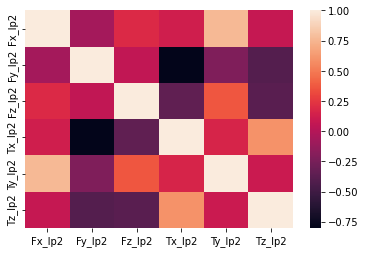

In [9]:
sns.heatmap(X_lp2[["Fx_lp2", "Fy_lp2", "Fz_lp2", "Tx_lp2", "Ty_lp2", "Tz_lp2"]].corr())

Converting the DF to numpy so as to convert it into 3d arrays and compute the average and overall force torque values
Followed by reshaping it into 3d numpy arrays

In [10]:
X_lp2_numpy = X_lp2.to_numpy()
X_lp2_numpy = X_lp2_numpy.reshape(-1,15,8)

In [11]:
print(X_lp2_numpy.shape)
print(X_lp2_numpy)

(47, 15, 8)
[[[0.40764331 0.44407895 0.2022792  ... 0.5754717  0.08638823 0.00374288]
  [0.40764331 0.44407895 0.1965812  ... 0.5754717  0.08011548 0.00259755]
  [0.40764331 0.44407895 0.1965812  ... 0.5754717  0.08011548 0.00259755]
  ...
  [0.40764331 0.44407895 0.19373219 ... 0.5754717  0.07697915 0.00374288]
  [0.4044586  0.44407895 0.1994302  ... 0.58018868 0.08334983 0.00287546]
  [0.40764331 0.44407895 0.1965812  ... 0.5754717  0.08011548 0.00259755]]

 [[0.43312102 0.44407895 0.1965812  ... 0.56132075 0.08074988 0.00418402]
  [0.5477707  0.4375     0.1994302  ... 0.58962264 0.11579946 0.05908502]
  [0.39808917 0.46052632 0.18233618 ... 0.57075472 0.06519577 0.01869571]
  ...
  [0.41082803 0.43092105 0.1994302  ... 0.5754717  0.08366315 0.00773468]
  [0.40127389 0.46381579 0.19373219 ... 0.55660377 0.07770185 0.01762113]
  [0.40127389 0.45065789 0.1994302  ... 0.5990566  0.08348696 0.01329685]]

 [[0.40764331 0.42763158 0.21367521 ... 0.58490566 0.09957906 0.01519619]
  [0.41401

Taking the mean of all the 15 readings for all the 8 columns

In [12]:
X_lp2_avg = np.mean(X_lp2_numpy, axis=1)

Converting to dataframes for better visualisation

In [13]:
X_lp2_dfprime = pd.DataFrame(X_lp2_avg, columns=["Fx_lp2", "Fy_lp2", "Fz_lp2", "Tx_lp2", "Ty_lp2", "Tz_lp2", "F_lp2", "T_lp2"])

Combining X and Y 

In [14]:
X_lp2_df = pd.concat([X_lp2_dfprime, Y_lp2], axis = 1)

X_lp2_df = 

In [15]:
print(X_lp2_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fx_lp2  47 non-null     float64
 1   Fy_lp2  47 non-null     float64
 2   Fz_lp2  47 non-null     float64
 3   Tx_lp2  47 non-null     float64
 4   Ty_lp2  47 non-null     float64
 5   Tz_lp2  47 non-null     float64
 6   F_lp2   47 non-null     float64
 7   T_lp2   47 non-null     float64
 8   Y_lp2   47 non-null     float64
dtypes: float64(9)
memory usage: 3.4 KB
None


In [16]:
print(X_lp2_df.describe())

          Fx_lp2     Fy_lp2     Fz_lp2     Tx_lp2     Ty_lp2     Tz_lp2  \
count  47.000000  47.000000  47.000000  47.000000  47.000000  47.000000   
mean    0.412188   0.440850   0.202348   0.490589   0.263560   0.544025   
std     0.026937   0.018741   0.013576   0.015153   0.017307   0.017778   
min     0.365605   0.388596   0.169041   0.448657   0.237876   0.496855   
25%     0.402442   0.436842   0.196486   0.482701   0.252911   0.531761   
50%     0.405945   0.438816   0.200190   0.489889   0.257582   0.539623   
75%     0.411677   0.443969   0.207028   0.499092   0.269482   0.553616   
max     0.508917   0.488158   0.261728   0.524803   0.317274   0.580818   

           F_lp2      T_lp2      Y_lp2  
count  47.000000  47.000000  47.000000  
mean    0.099494   0.041827   1.510638  
std     0.025211   0.024972   1.586250  
min     0.071640   0.002955   0.000000  
25%     0.081492   0.024047   0.000000  
50%     0.092266   0.035995   1.000000  
75%     0.105781   0.049612   3.00000

Now is that all the data are checked for null values (no null values present), now data is visualised using various tools

1. Scatter Plot (done on both decimal and log scale)

lp2

In [17]:
dic = {"Fx_lp2": "red", "Fy_lp2": "blue" , "Fz_lp2": "green" , "Tx_lp2": "black", "Tx_lp2": "purple", "Ty_lp2": "orange", "Tz_lp2": "yellow"}
lp2_scatter = plty.scatter(X_lp2_df, x = ["Fx_lp2", "Fy_lp2", "Fz_lp2", "Tx_lp2", "Ty_lp2", "Tz_lp2"],  color_discrete_map= dic)
lp2_logscatter = plty.scatter(X_lp2_df,  x = ["Fx_lp2", "Fy_lp2", "Fz_lp2", "Tx_lp2", "Ty_lp2", "Tz_lp2"] , y= "Y_lp2", log_x=True)
lp2_scatter.show()
lp2_logscatter.show()

Kernel density estimation plot

<AxesSubplot:xlabel='F_lp2', ylabel='Density'>

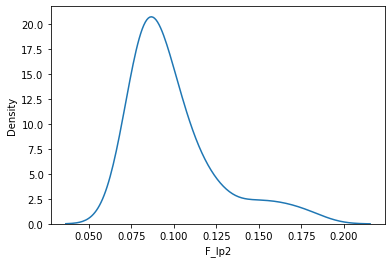

In [18]:
sns.kdeplot(data=X_lp2_df, x = 'F_lp2', bw_method = "scott" , bw_adjust = 1)

<AxesSubplot:xlabel='T_lp2', ylabel='Density'>

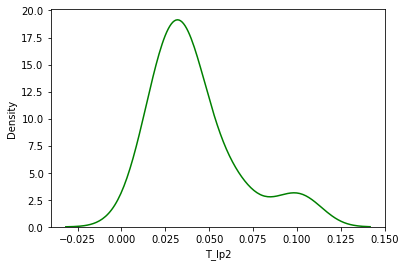

In [19]:
sns.kdeplot(data=X_lp2_df, x = 'T_lp2', color="Green")

In [20]:
plty.scatter(X_lp2_df, x = "F_lp2", y = "T_lp2", color="Y_lp2", log_x=True, log_y=True)

Boxplot

In [21]:
plty.box(X_lp2_df, x = ["F_lp2", "T_lp2"])

Refining the cluster and plotting scatter and box plots without outliers

In [22]:
#X_lp2_df = X_lp2_df.drop(X_lp2_df[((X_lp2_df.F_lp2 < 0.09) & (X_lp2_df.Y_lp2==1))].index)
X_lp2_df.loc[X_lp2_df["T_lp2"] > 0.088, "T_lp2"] = 0.0713
X_lp2_df.loc[X_lp2_df["F_lp2"] > 0.127, "F_lp2"] = 0.126

In [23]:
plty.scatter(X_lp2_df, x = "F_lp2", y = "T_lp2", color="Y_lp2", log_x=True, log_y=True)

In [24]:
plty.scatter(X_lp2_df, x = ["Fx_lp2", "Fy_lp2", "Fz_lp2", "Tx_lp2", "Ty_lp2", "Tz_lp2"],   color_discrete_map= dic)

In [25]:
plty.scatter(X_lp2_df, x = ["Fx_lp2", "Fy_lp2", "Fz_lp2", "Tx_lp2", "Ty_lp2", "Tz_lp2"],   color= "Y_lp2")

Boxplot

In [26]:
plty.box(X_lp2_df, x = ["F_lp2", "T_lp2"])

To know the class distribution

In [27]:
np.unique(Y_lp2.to_numpy(), return_counts=True)

(array([0., 1., 2., 3., 4.]), array([20,  6,  7,  5,  9], dtype=int64))

Training the dataset

Splitting test and train set in the ratio of 70:30

In [28]:
from sklearn.model_selection import train_test_split

lp2_train, lp2_test = train_test_split(X_lp2_df, test_size=0.3, random_state=2)


1. Decision Tree

In [29]:
print("Training using Decision Tree...")
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_validate
acc = pd.DataFrame(columns={"Model": [], "Train": [], "Dev": [], "Test":[], "Precision Score": [], "Recall Score": [], "F1 Score": [] })
X = lp2_train[["F_lp2", "T_lp2" ]]
Y = lp2_train["Y_lp2"]
lp2_model = tree.DecisionTreeClassifier(criterion="log_loss",  max_depth=4)
treemodel = cross_validate(lp2_model, X, Y, cv=3,return_train_score=True)
lp2_model.fit(X, Y)

Training using Decision Tree...


DecisionTreeClassifier(criterion='log_loss', max_depth=4)

Results

In [30]:
print("++++++Decision Tree++++++")
print("+++Train Results+++\nParametes: \n",lp2_model.get_params())
train_pred = lp2_model.predict(lp2_train[["F_lp2", "T_lp2"]])
accuracy_scr1 = treemodel['train_score'].mean()
print("\nTrain Score", treemodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", treemodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("\n+++Test Results+++\nParametes: \n",lp2_model.get_params())
test_pred = lp2_model.predict(lp2_test[["F_lp2", "T_lp2"]])
# print("\nPrediction of test set:", test_pred)
# print(lp2_test["Y_lp2"])
accuracy_scr2 = accuracy_score(lp2_test["Y_lp2"], test_pred)
print("\nTest accuracy score", accuracy_scr2)
confMat = confusion_matrix(lp2_test["Y_lp2"], test_pred, labels=[0,1,2,3,4])
print("\nConfusion Matrix:\n",confMat)
prec_tree = precision_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_tree)
Rec_tree = recall_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_tree)
f1_tree = f1_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_tree)
acc.loc[len(acc.index)] = ['Decision Tree', accuracy_scr1, treemodel['test_score'].mean(), accuracy_scr2, prec_tree.mean(), Rec_tree.mean(), f1_tree.mean()] 

++++++Decision Tree++++++
+++Train Results+++
Parametes: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Train Score 0.8744588744588744
_____________________________________________________________________________________
Validation Score 0.5666666666666667
_____________________________________________________________________________________

+++Test Results+++
Parametes: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Test accuracy score 0.7333333333333333

Confusion Matrix:
 [[8 0 0 0 0]
 [1 0 2 0 0]
 [0 0 1 0 0]
 [0 0 0 0

In [31]:
#lp2_model.predict_proba(lp2_test[["F_lp2", "T_lp2"]])

Printing the tree

[Text(0.375, 0.9, 'X[0] <= 0.089\nlog_loss = 2.175\nsamples = 32\nvalue = [12, 3, 6, 5, 6]'),
 Text(0.2916666666666667, 0.7, 'log_loss = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0, 0]'),
 Text(0.4583333333333333, 0.7, 'X[1] <= 0.041\nlog_loss = 1.953\nsamples = 20\nvalue = [0, 3, 6, 5, 6]'),
 Text(0.25, 0.5, 'X[1] <= 0.035\nlog_loss = 0.863\nsamples = 7\nvalue = [0, 0, 2, 0, 5]'),
 Text(0.16666666666666666, 0.3, 'X[0] <= 0.092\nlog_loss = 0.918\nsamples = 3\nvalue = [0, 0, 2, 0, 1]'),
 Text(0.08333333333333333, 0.1, 'log_loss = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]'),
 Text(0.25, 0.1, 'log_loss = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]'),
 Text(0.3333333333333333, 0.3, 'log_loss = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 4]'),
 Text(0.6666666666666666, 0.5, 'X[1] <= 0.055\nlog_loss = 1.826\nsamples = 13\nvalue = [0, 3, 4, 5, 1]'),
 Text(0.5, 0.3, 'X[0] <= 0.101\nlog_loss = 1.522\nsamples = 5\nvalue = [0, 2, 0, 2, 1]'),
 Text(0.4166666666666667, 0.1, 'log_loss = 0.0\nsamples = 2\nvalue

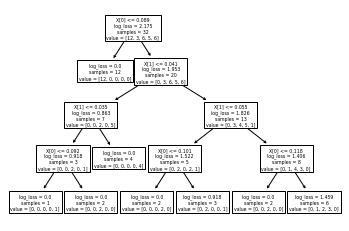

In [32]:
tree.plot_tree(lp2_model)

Exporting the model to txt file

In [33]:
# from sklearn.tree import export_text
# lp2export_tree = export_text(lp2_model) 
# with open('lp2exportree.txt', 'w') as f:
#     f.writelines(lp2export_tree)

2. Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
lp2_forest = RandomForestClassifier(criterion="log_loss",  max_depth=4)
X = lp2_train[["F_lp2", "T_lp2"]]
Y = lp2_train["Y_lp2"]
forestmodel = cross_validate(lp2_forest, X, Y, cv=3,return_train_score=True)
lp2_forest.fit(X, Y)

RandomForestClassifier(criterion='log_loss', max_depth=4)

In [35]:
print("++++++Random Forest++++++")
print("+++Train Results+++\nParametes: \n",lp2_forest.get_params())
train_pred = lp2_forest.predict(lp2_train[["F_lp2", "T_lp2"]])
accuracy_scr1 = forestmodel['train_score'].mean()
print("\nTrain Score", forestmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", forestmodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("+++Test Results+++\nParametes: \n",lp2_forest.get_params())
test_pred = lp2_forest.predict(lp2_test[["F_lp2", "T_lp2"]])
#print("\nPrediction of test set:", test_pred)
accuracy_scr2 = accuracy_score(lp2_test["Y_lp2"], test_pred)
print("\nTest accuracy score", accuracy_scr2)
confMat = confusion_matrix(lp2_test["Y_lp2"], test_pred, labels=[0,1,2,3,4])
print("Confusion Matrix:\n",confMat)
prec_forest = precision_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_forest)
Rec_forest = recall_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_forest)
f1_forest = f1_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_forest)
acc.loc[len(acc.index)] = ['Random Forest', accuracy_scr1, forestmodel['test_score'].mean(), accuracy_scr2, prec_forest.mean(), Rec_forest.mean(), f1_forest.mean()] 

++++++Random Forest++++++
+++Train Results+++
Parametes: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Train Score 0.9372294372294373
_____________________________________________________________________________________
Validation Score 0.5969696969696969
_____________________________________________________________________________________
+++Test Results+++
Parametes: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 

3. Support Vector Machines

In [36]:
from sklearn import svm
X = lp2_train[["F_lp2", "T_lp2" ]]
Y = lp2_train["Y_lp2"]
lp2_SVM_Model = svm.SVC(decision_function_shape='ovo')
svmmodel = cross_validate(lp2_SVM_Model, X, Y, cv=3,return_train_score=True)
lp2_SVM_Model.fit(X, Y)

SVC(decision_function_shape='ovo')

In [37]:
print("++++++Support Vector Machines++++++")
print("+++Train Results+++\nParametes: \n",lp2_SVM_Model.get_params())
train_pred = lp2_SVM_Model.predict(lp2_train[["F_lp2", "T_lp2"]])
accuracy_scr1 = svmmodel['train_score'].mean()
print("\nTrain Score", svmmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", svmmodel['test_score'].mean())
print("_____________________________________________________________________________________")
print("+++Test Results+++\nParametes: \n",lp2_SVM_Model.get_params())
X_test = lp2_test[["F_lp2", "T_lp2" ]]
Y_test = lp2_test["Y_lp2"]
test_pred = lp2_SVM_Model.predict(X_test)
accuracy_scr2 = accuracy_score(Y_test, test_pred)
print("\nTest Accuracy", accuracy_scr2)
confMat = confusion_matrix(lp2_test["Y_lp2"], test_pred, labels=[0,1,2,3,4])
print("Confusion Matrix:\n",confMat)
prec_SVM = precision_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_SVM)
Rec_SVM = recall_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_SVM)
f1_SVM = f1_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_SVM)
acc.loc[len(acc.index)] = ['SVM', accuracy_scr1, svmmodel['test_score'].mean(), accuracy_scr2,prec_SVM.mean(), Rec_SVM.mean(), f1_SVM.mean()] 

++++++Support Vector Machines++++++
+++Train Results+++
Parametes: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Train Score 0.5945165945165946
_____________________________________________________________________________________
Validation Score 0.5333333333333333
_____________________________________________________________________________________
+++Test Results+++
Parametes: 
 {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Test Accuracy 0.6
Confusion Matrix:
 [[8 0 0 0 0]
 [2 0 1 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [1 0 1 0

4. Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
X = lp2_train[["F_lp2", "T_lp2" ]]
Y = lp2_train["Y_lp2"]
lp2_GNB_Model = GaussianNB()
gnbmodel = cross_validate(lp2_GNB_Model, X, Y, cv=3,return_train_score=True)
lp2_GNB_Model.fit(X, Y)

GaussianNB()

In [39]:
print("++++++Gaussian Naive Bayes++++++")
print("+++Train Results+++\nParametes: \n",lp2_GNB_Model.get_params())
train_pred = lp2_GNB_Model.predict(lp2_train[["F_lp2", "T_lp2"]])
accuracy_scr1 = gnbmodel['train_score'].mean()
print("\nTrain Score", gnbmodel['train_score'].mean())
print("_____________________________________________________________________________________")
print("Validation Score", gnbmodel['test_score'].mean())
print("_____________________________________________________________________________________")
X_test = lp2_test[["F_lp2", "T_lp2" ]]
Y_test = lp2_test["Y_lp2"]
test_pred = lp2_GNB_Model.predict(X_test)
accuracy_scr2 = accuracy_score(Y_test, test_pred)
print("Test Accuracy", accuracy_scr2)
confMat = confusion_matrix(lp2_test["Y_lp2"], test_pred, labels=[0,1,2,3,4])
print("Confusion Matrix:\n",confMat)
prec_GNB = precision_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("\nPrecision Score:",prec_GNB)
Rec_GNB = recall_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("Recall Score:",Rec_GNB)
f1_GNB = f1_score(lp2_test["Y_lp2"], test_pred, average=None, zero_division=0)
print("F1 Score:",f1_GNB)
acc.loc[len(acc.index)] = ['Gaussian Naive Bayes', accuracy_scr1, gnbmodel['test_score'].mean(), accuracy_scr2, prec_GNB.mean(), Rec_GNB.mean(), f1_GNB.mean()] 

++++++Gaussian Naive Bayes++++++
+++Train Results+++
Parametes: 
 {'priors': None, 'var_smoothing': 1e-09}

Train Score 0.6883116883116883
_____________________________________________________________________________________
Validation Score 0.5969696969696969
_____________________________________________________________________________________
Test Accuracy 0.6666666666666666
Confusion Matrix:
 [[8 0 0 0 0]
 [0 0 0 2 1]
 [0 0 0 0 1]
 [0 0 0 0 0]
 [0 0 0 1 2]]

Precision Score: [1.  0.  0.  0.  0.5]
Recall Score: [1.         0.         0.         0.         0.66666667]
F1 Score: [1.         0.         0.         0.         0.57142857]


5. Shallow Neural Networks

Splitting the data as test validation (dev) and train set using stratified shuffling with 4 n splits

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
lp2_train = sss.split(X_lp2_df[["F_lp2", "T_lp2" ]], X_lp2_df["Y_lp2"])
for train,test in sss.split(X_lp2_df[["F_lp2", "T_lp2" ]], X_lp2_df["Y_lp2"]):
    X = X_lp2_df[["F_lp2", "T_lp2" ]].iloc[train]
    Y = X_lp2_df["Y_lp2"].iloc[train]
    X_dt = X_lp2_df[["F_lp2", "T_lp2" ]].iloc[test]
    Y_dt = X_lp2_df["Y_lp2"].iloc[test]
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
for train,test in sss.split(X_dt, Y_dt):
    xd = X_dt.iloc[train]
    yd = Y_dt.iloc[train]
    X_test = X_dt.iloc[test]
    Y_test = Y_dt.iloc[test]
# lp2_train, lp2_Devtest = train_test_split(X_lp2_df, test_size=0.3, random_state=2)
# lp2_dev, lp2_test = train_test_split(lp2_Devtest, test_size=0.5, random_state=2)
# print(xd.value_counts())  
# print(yd.value_counts())
# print(X_test.value_counts())  
# print(Y_test.value_counts())

In [41]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf   #For reproducability
tf.random.set_seed(2)
lp2_SNN_model = tf.keras.Sequential()
lp2_SNN_model.add(Dense(2, activation='LeakyReLU', input_shape = (2,)))
lp2_SNN_model.add(Dense(100, activation='LeakyReLU'))
#lp2_SNN_model.add(Dropout(0.2))
# lp2_SNN_model.add(Dense(30, activation='LeakyReLU'))
# lp2_SNN_model.add(Dense(84, activation='relu'))
# lp2_SNN_model.add(Dense(84, activation='LeakyReLU'))
# lp2_SNN_model.add(Dense(14, activation='relu'))
lp2_SNN_model.add(Dense(5, activation='softmax'))

In [42]:
#opti = keras.optimizers.experimental.SGD(learning_rate=0.01)
opti = keras.optimizers.Adam(learning_rate=0.005)
lp2_SNN_model.compile(optimizer=opti, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
history = lp2_SNN_model.fit(X, Y, batch_size=2, epochs=95, validation_data = (xd, yd), shuffle=False)

Epoch 1/95
16/16 [==============================] - 1s 17ms/step - loss: 1.5628 - accuracy: 0.3750 - val_loss: 1.5165 - val_accuracy: 0.4286
Epoch 2/95
16/16 [==============================] - 0s 4ms/step - loss: 1.4779 - accuracy: 0.4375 - val_loss: 1.4853 - val_accuracy: 0.4286
Epoch 3/95
16/16 [==============================] - 0s 5ms/step - loss: 1.4587 - accuracy: 0.4375 - val_loss: 1.4876 - val_accuracy: 0.4286
Epoch 4/95
16/16 [==============================] - 0s 5ms/step - loss: 1.4532 - accuracy: 0.4375 - val_loss: 1.4850 - val_accuracy: 0.4286
Epoch 5/95
16/16 [==============================] - 0s 4ms/step - loss: 1.4496 - accuracy: 0.4375 - val_loss: 1.4827 - val_accuracy: 0.4286
Epoch 6/95
16/16 [==============================] - 0s 4ms/step - loss: 1.4475 - accuracy: 0.4375 - val_loss: 1.4806 - val_accuracy: 0.4286
Epoch 7/95
16/16 [==============================] - 0s 4ms/step - loss: 1.4451 - accuracy: 0.4375 - val_loss: 1.4781 - val_accuracy: 0.4286
Epoch 8/95
16/16 [=

Plotting loss vs epoch

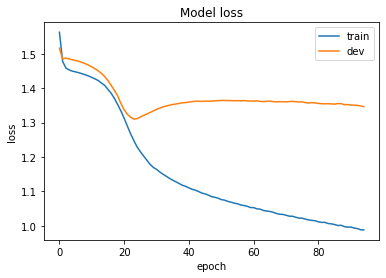

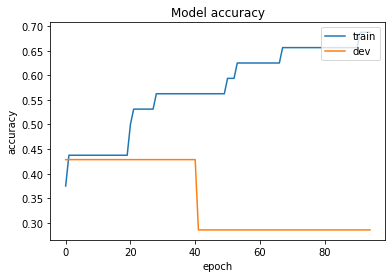

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper right')
plt.show()

In [44]:
lp2_SNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 100)               300       
                                                                 
 dense_2 (Dense)             (None, 5)                 505       
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [45]:
pred = lp2_SNN_model.predict(X_test)
# #print(pred*100)
pred_class = np.argmax(pred, axis=1)
# #print(pred_class)
# acc_score_SNN = accuracy_score(Y_test, pred_class)
# print(acc_score_SNN)
confMat = confusion_matrix(Y_test, pred_class, labels=[0,1,2,3,4])
print("Confusion Matrix:\n",confMat)
prec_SNN = precision_score(Y_test, pred_class, average=None, zero_division=0)
print("\nPrecision Score:",prec_SNN)
Rec_SNN = recall_score(Y_test, pred_class, average=None, zero_division=0)
print("Recall Score:",Rec_SNN)
f1_SNN = f1_score(Y_test, pred_class, average=None, zero_division=0)
print("F1 Score:",f1_SNN)

1/1 [==============================] - 0s 104ms/step
Confusion Matrix:
 [[3 0 0 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 0 0 0 1]]

Precision Score: [0.75 0.   0.5  0.   0.5 ]
Recall Score: [1.  0.  1.  0.  0.5]
F1 Score: [0.85714286 0.         0.66666667 0.         0.5       ]


In [46]:
print(lp2_SNN_model.metrics_names)
test_accuracy = lp2_SNN_model.evaluate(X_test, Y_test)
print(test_accuracy)

['loss', 'accuracy']
1/1 [==============================] - 0s 36ms/step - loss: 1.2927 - accuracy: 0.6250
[1.2927058935165405, 0.625]


In [47]:
acc.loc[len(acc.index)] = ['ANN', ((history.history['accuracy'][-1])),((history.history['val_accuracy'][-1])), test_accuracy[1], prec_SNN.mean(), Rec_SNN.mean(), f1_SNN.mean()] 

Exporting the model and weights

In [48]:
# lp2_SNN_model.save('exports/lp2_SNN_Export')
# lp2_SNN_model.save_weights('exports/lp2_SNNWeights_Export')

Overall parameters

In [49]:
acc

,Model,Train,Dev,Test,Precision Score,Recall Score,F1 Score
0,Decision Tree,0.874459,0.566667,0.733333,0.444444,0.533333,0.448235
1,Random Forest,0.937229,0.596970,0.733333,0.444444,0.533333,0.448235
2,SVM,0.594517,0.533333,0.600000,0.416667,0.333333,0.325000
3,Gaussian Naive Bayes,0.688312,0.596970,0.666667,0.300000,0.333333,0.314286
4,ANN,0.687500,0.285714,0.625000,0.350000,0.500000,0.404762
